In [195]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.datasets import electrocardiogram
from scipy.signal import find_peaks, argrelmin, find_peaks_cwt
import pandas as pd
from collections import Counter
from scipy import signal


In [196]:
from sklearn.linear_model import SGDRegressor 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error 


from sklearn.pipeline import make_pipeline


In [197]:
path = "/Users/cslinxs/Desktop/all_weeks/aurorabp-sample-data/sample/measurements_auscultatory/a001/a001.initial.Calibration_start_3.tsv"
#path = "/Users/cslinxs/Desktop/all_weeks/aurorabp-sample-data/sample/measurements_auscultatory/a002/a002.initial.Static_seated_challenge_1.tsv"
#path ="/Users/cslinxs/Desktop/all_weeks/aurorabp-sample-data/sample/measurements_auscultatory/a004/a004.initial.Exercise_challenge_start_1.tsv"
path = "/Users/cslinxs/Desktop/all_weeks/aurorabp-sample-data/sample/measurements_auscultatory/a000/a000.initial.Static_challenge_start_1.tsv"


path ="/Users/cslinxs/Desktop/all_weeks/aurorabp-sample-data/sample/measurements_auscultatory/a000/a000.initial.Static_seated_challenge_1.tsv"

In [198]:
# df = pd.read_csv(path,sep = '\t')   
# pos_pressure = df["pressure"]

# for i in range(80,200,10):

#     neglist = [ -x for x in pos_pressure]

#     min_peaks, _ = find_peaks(neglist, prominence=10, width=100 )


#     plt.plot(pos_pressure)
#     plt.plot(min_peaks, pos_pressure[min_peaks], "x")
#     plt.title(f"mins {i} pro w/ len {len(min_peaks)}")
#     plt.show()

In [199]:
df = pd.read_csv(path,sep = '\t')   
pos_pressure = df["pressure"]

In [200]:
# df = pd.read_csv(path,sep = '\t')   
# pos_pressure = df["pressure"]


# b, a = signal.butter(5, 80, fs=pos_pressure)
# #print(b,a)

# fgust = signal.filtfilt(b, a, x= pos_pressure, method="gust")
# plt.plot(fgust, 'b-', linewidth=1, label='gust')


# plt.legend(loc='best')
# plt.show()

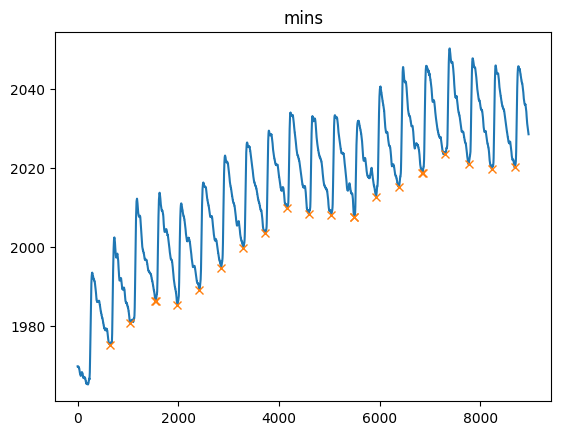

In [201]:

df = pd.read_csv(path,sep = '\t')   
pos_pressure = df["pressure"]

neglist = [ -x for x in pos_pressure]

min_peaks, _ = find_peaks(neglist, prominence=10,width=80 )


plt.plot(pos_pressure)
plt.plot(min_peaks, pos_pressure[min_peaks], "x")
plt.title("mins")
plt.show()


<class 'numpy.ndarray'>


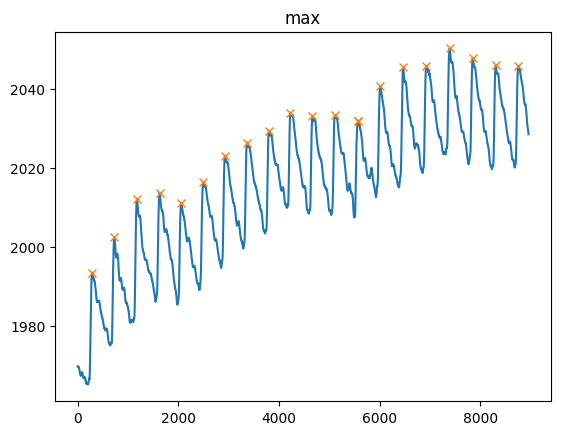

In [202]:

df = pd.read_csv(path,sep = '\t')   
pos_pressure = df["pressure"]


max_peak, _ = find_peaks(pos_pressure, prominence=10,width=80
                         )

plt.plot(pos_pressure)
print(type(max_peak))
plt.plot(max_peak, pos_pressure[max_peak], "x")
plt.title("max")

plt.show()

In [203]:
#this is so i can see the diffrences in the graph widths
diffrences_min = np.diff(min_peaks)
mean_min = float(diffrences_min.mean())

diffrences_max = np.diff(max_peak)
mean_max = float(diffrences_max.mean())


print(mean_min,mean_max )

382.7142857142857 423.35


In [204]:
#this edeleuets all elemerns with in 40 of the mini
need_to_go  = []

set_max_peak = set(max_peak)
for mini in list(min_peaks):
    if len(set(range(mini-40,40+mini)).intersection(set_max_peak))>0:
        need_to_go.append(int(mini))

combo_list =  list(min_peaks)+ (need_to_go)
combo_list = [int(i) for i in combo_list]

# juts deleted stuff from both lists if its in tht 40 range
new_mins = [k for k,v in Counter(combo_list).items() if v==1]



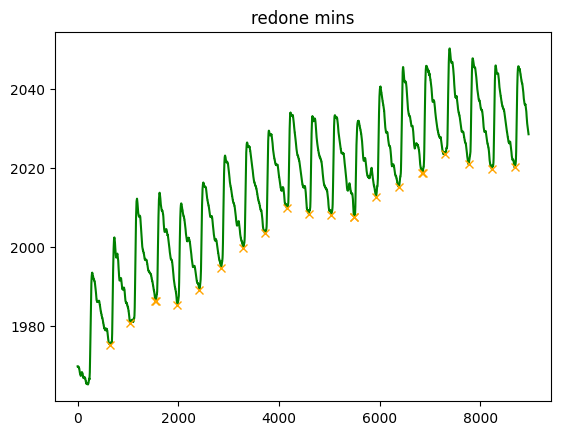

In [205]:

#fileted ghrough mins
df = pd.read_csv(path,sep = '\t')   
pos_pressure = df["pressure"]


plt.plot(pos_pressure, color="green")


newst_mins= np.asarray(list(new_mins), dtype=np.float32)

plt.plot(newst_mins, pos_pressure[newst_mins], "x", color="orange")
plt.title("redone mins")

plt.show()

This the diffrence in means:

In [206]:
#print(min_peaks,peaks)
diffrences_min = np.diff(min_peaks)

mean_min = float(diffrences_min.mean())

diffrences_max = np.diff(max_peak)

mean_max = float(diffrences_max.mean())


diffrences_new_min = np.diff(newst_mins)

mean_new_min = float(diffrences_new_min.mean())


print(mean_min,mean_max,mean_new_min )


382.7142857142857 423.35 382.71429443359375


In [207]:
diffrences_new_min

array([398., 500.,   4., 431., 438., 433., 441., 431., 434., 434., 448.,
       454.,   3., 433., 453., 464.,   7., 454., 459., 463., 455.],
      dtype=float32)

In [208]:
# here i think if i get the stats of the list i can ssee if something is weird and drop the point
#  BUTTTT HERE IS WHERE I SEE WHAT POINT HAS TO GO

def get_stats(check_list):
    standard = float(np.std(check_list))
    mean = float(np.mean(check_list))
    return [min(check_list),mean-standard-standard,mean-standard,mean,mean + standard,mean +standard+standard ,max(check_list) ]
get_stats(diffrences_new_min)[5]

693.6748046875

here is where i wanna remvoe the things tooo far away frommthe mena

so i will say noise is when the chatr is showing a beat within 20 mins of another

if something is 20+- another beat in the other list it is removed

[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [2], [2], [3], [4], [5], [6], [7], [7], [8], [9], [10], [11], [12], [13], [14], [15], [15], [16], [17], [18], [18], [19], [20], [20], [21], [21], [22], [22], [23], [23], [23], [24], [24], [24], [25], [25], [25], [25], [25], [26], [26], [25], [25], [25], [25], [25], [25], [25], [25], [25], [24], [24], [24], [24], [24], [24], [23], [23], [23], [23], [23], [22], [22], [22], [22], [22], [21], [21], [21], [21], [21], [21], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [20], [21], [21], [21], [21], [21], [21], [21], [21], [21], [21], [21], [21], [21], [20], [20], [20], [20], [20], [20], [20], [20], [19], [19], [19], [18], [18], [17], [17], [17], [17], [16], [16], [16], [16], [16], [15], [15], [15], [15], [15]

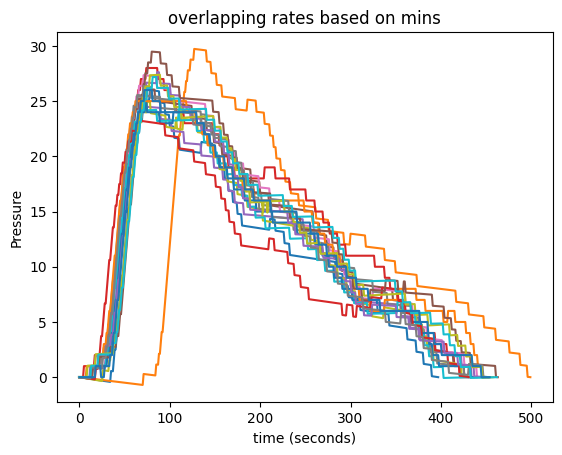

In [209]:
all_overlaps = [[] for i in range(int(max(diffrences_new_min)))]

df = pd.read_csv(path,sep = '\t')   
pos_pressure = df["pressure"]

newst_mins= np.asarray(list(new_mins), dtype=np.float32)

mini_list = list(newst_mins)

for i in range(len(mini_list)-1):

    if (int(mini_list[i+1]) -int(mini_list[i]))< get_stats(diffrences_new_min)[4] :
        y_range  = list(range(int(mini_list[i]),int(mini_list[i+1])))
        y_of_shift = [int(y - min(pos_pressure[y_range])) for y in pos_pressure[y_range]]

        x_range = list(range(int(mini_list[i]),int(mini_list[i+1])))
        x_of_shift = [int(x - x_range[0]) for x in x_range]
        start_end_line = np.linspace(y_of_shift[0], y_of_shift[-1], len(y_of_shift), endpoint=True)

        y_rotated = [xi - yi for xi, yi in zip(y_of_shift, start_end_line)]


        for x_indi in range(len(x_range)):
            #print(x_indi)
            #all_overlaps[x_indi].append(
            all_overlaps[x_indi].append(int(y_of_shift[x_indi]-start_end_line[x_indi]))
        
        # um all_overlaps and y_rotated does the same thing... i think, it is but it has some error
        print(all_overlaps)
        #plt.plot(start_end_line)
        

        plt.plot(x_of_shift, y_rotated)



plt.title("overlapping rates based on mins")
plt.ylabel("Pressure")
plt.xlabel("time (seconds)")

plt.show()

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0], [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0], [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0], [0, 0

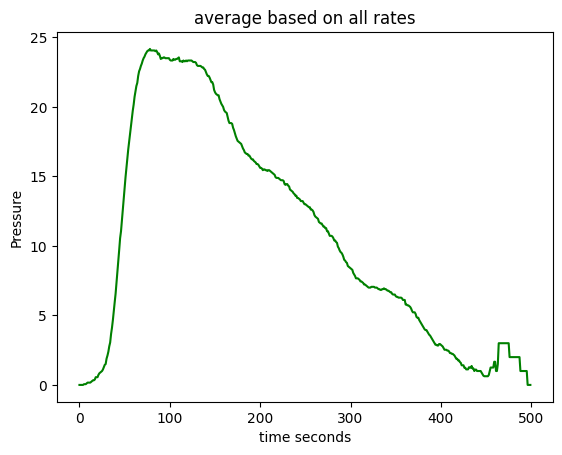

In [210]:
#to get data for the overall mean 
all_overlaps_means = []
#mean for each row
for lists in all_overlaps:
    all_overlaps_means.append(np.mean(lists))

print(all_overlaps)
all_overlaps_means = [x for x in all_overlaps_means if str(x) != 'nan']
plt.plot(all_overlaps_means, color='green')
plt.title("average based on all rates")
plt.ylabel("Pressure")
plt.xlabel("time seconds")
contecting_it = np.linspace(all_overlaps_means[0], all_overlaps_means[-1], len(all_overlaps_means), endpoint=True)
#plt.plot(contecting_it)
plt.show()
all_overlaps_means = [x for x in all_overlaps_means if str(x) != 'nan']


In [211]:
print(contecting_it)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

IMPOETANPINTS

In [212]:
all_overlaps_means

[np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.05263157894736842),
 np.float64(0.05263157894736842),
 np.float64(0.05555555555555555),
 np.float64(0.1111111111111111),
 np.float64(0.16666666666666666),
 np.float64(0.16666666666666666),
 np.float64(0.16666666666666666),
 np.float64(0.16666666666666666),
 np.float64(0.2222222222222222),
 np.float64(0.2777777777777778),
 np.float64(0.3333333333333333),
 np.float64(0.3333333333333333),
 np.float64(0.3888888888888889),
 np.float64(0.5555555555555556),
 np.float64(0.5555555555555556),
 np.float64(0.5555555555555556),
 np.float64(0.7222222222222222),
 np.float64(0.8333333333333334),
 np.float64(0.8888888888888888),
 np.float64(0.9444444444444444),
 np.float64(1.0),
 np.float64(1.1111111111111112),
 np.float64(1.2777777777777777),
 np.float64(1.4444444444444444),
 np.float64(1.5),
 np.float64(1.8888888888888888),
 np.float64(2.111111111111111),
 np.float64(2.388888888888889),
 np.float64

In [213]:
all_overlaps_means

print(len(all_overlaps_means))

print(all_overlaps_means)



500
[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.05263157894736842), np.float64(0.05263157894736842), np.float64(0.05555555555555555), np.float64(0.1111111111111111), np.float64(0.16666666666666666), np.float64(0.16666666666666666), np.float64(0.16666666666666666), np.float64(0.16666666666666666), np.float64(0.2222222222222222), np.float64(0.2777777777777778), np.float64(0.3333333333333333), np.float64(0.3333333333333333), np.float64(0.3888888888888889), np.float64(0.5555555555555556), np.float64(0.5555555555555556), np.float64(0.5555555555555556), np.float64(0.7222222222222222), np.float64(0.8333333333333334), np.float64(0.8888888888888888), np.float64(0.9444444444444444), np.float64(1.0), np.float64(1.1111111111111112), np.float64(1.2777777777777777), np.float64(1.4444444444444444), np.float64(1.5), np.float64(1.8888888888888888), np.float64(2.111111111111111), np.float64(2.388888888888889), np.float64(2.7777777777777777), np.floa

[ 0.04062417  0.14286623  0.61223415  1.84547     6.60333586 14.18456484
 20.18937693 23.38129997 24.08445943 23.66858594 23.40568459 23.38685921
 23.28743986 23.1282914  22.48181542 21.24247569 19.81916442 18.43953543
 17.07043215 16.32855168 15.65850682 15.37086083 14.87926099 14.36007019
 13.55690336 13.02214385 12.28131633 11.39402942 10.62226642  9.4734222
  8.32363641  7.52597258  7.07071839  6.95990683  6.79807012  6.44074614
  5.98725528  5.2179078   4.26813106  3.31233023  2.75927565  2.37163578
  1.69389747  1.18881756  1.08335846  0.66129934  1.63261643  2.9521818
  2.13533023  1.21244792]
[224.5        -33.76187621  43.4531893   14.29127499  51.64528646
  40.86261337  67.42738615  63.82044577  85.22274248  85.53933119
 103.83504349 106.69149282 122.85599366 127.53996334 142.10806919
 148.20920614 161.50115897 168.76630745 180.98405559 189.25126612
 200.52481976 209.69014654 220.10170452 230.1015196  239.69845346
 250.5        259.30154654 270.8984804  278.89829548 291.30985

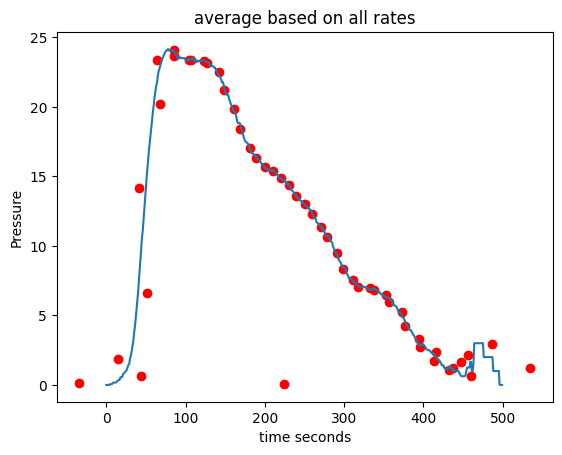

In [214]:
#to get data for the overall mean 
all_overlaps_means = []
#mean for each row
for lists in all_overlaps:
    all_overlaps_means.append(np.mean(lists))


all_overlaps_means = [x for x in all_overlaps_means if str(x) != 'nan']





resampled_y = signal.resample(all_overlaps_means, 50)
resampled_x = signal.resample(list(range(len(all_overlaps_means))), 50)
print((resampled_y))
print((resampled_x))

plt.plot(resampled_x,resampled_y,  'ro' )
#plt.plot(resampled_y,  'ro' )
print(len(all_overlaps_means))
plt.plot(all_overlaps_means )

plt.title("average based on all rates")
plt.ylabel("Pressure")
plt.xlabel("time seconds")

plt.show()

all_overlaps_means[0::10]

In [215]:
new_50 = [[x,y] for x, y in zip(resampled_x, resampled_y)]
new_50

[[np.float64(224.5), np.float64(0.04062417239616389)],
 [np.float64(-33.76187620964089), np.float64(0.14286623227299788)],
 [np.float64(43.45318930004487), np.float64(0.6122341497748222)],
 [np.float64(14.291274985835699), np.float64(1.845469998056564)],
 [np.float64(51.645286460394686), np.float64(6.60333586491424)],
 [np.float64(40.86261336848827), np.float64(14.18456484306514)],
 [np.float64(67.42738614671102), np.float64(20.18937692503526)],
 [np.float64(63.820445767173034), np.float64(23.38129997324333)],
 [np.float64(85.22274247504008), np.float64(24.08445942852881)],
 [np.float64(85.53933119114294), np.float64(23.66858593884174)],
 [np.float64(103.83504349036804), np.float64(23.405684594974293)],
 [np.float64(106.69149282077508), np.float64(23.38685921249632)],
 [np.float64(122.85599366258634), np.float64(23.287439860260108)],
 [np.float64(127.539963339458), np.float64(23.128291400629355)],
 [np.float64(142.10806919357728), np.float64(22.481815417693085)],
 [np.float64(148.20920